In [103]:
#анализ и кластеризация стран
#источник: https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html
#Ищем похожие между собой страны и регионы

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('../DATA/CIA_Country_Facts.csv')

In [106]:
#EDA

In [107]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [109]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


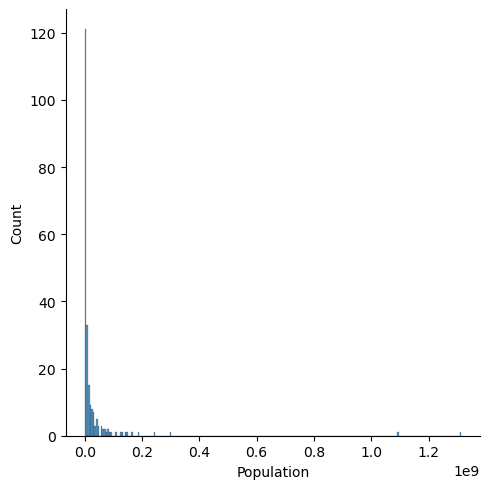

In [110]:
sns.displot(x = 'Population', data=df)

(0.0, 300000000.0)

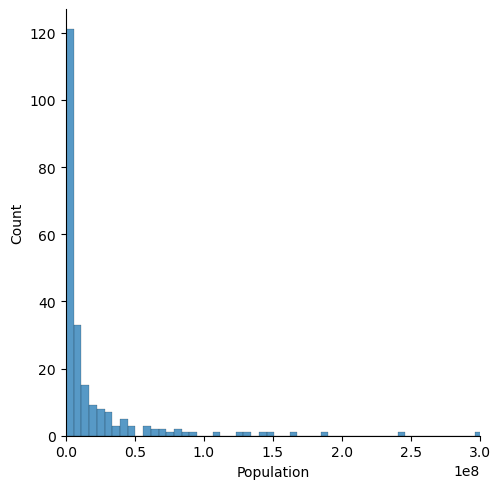

In [111]:
sns.displot(x = 'Population', data=df)
plt.xlim(0, 0.3e+9)

In [112]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

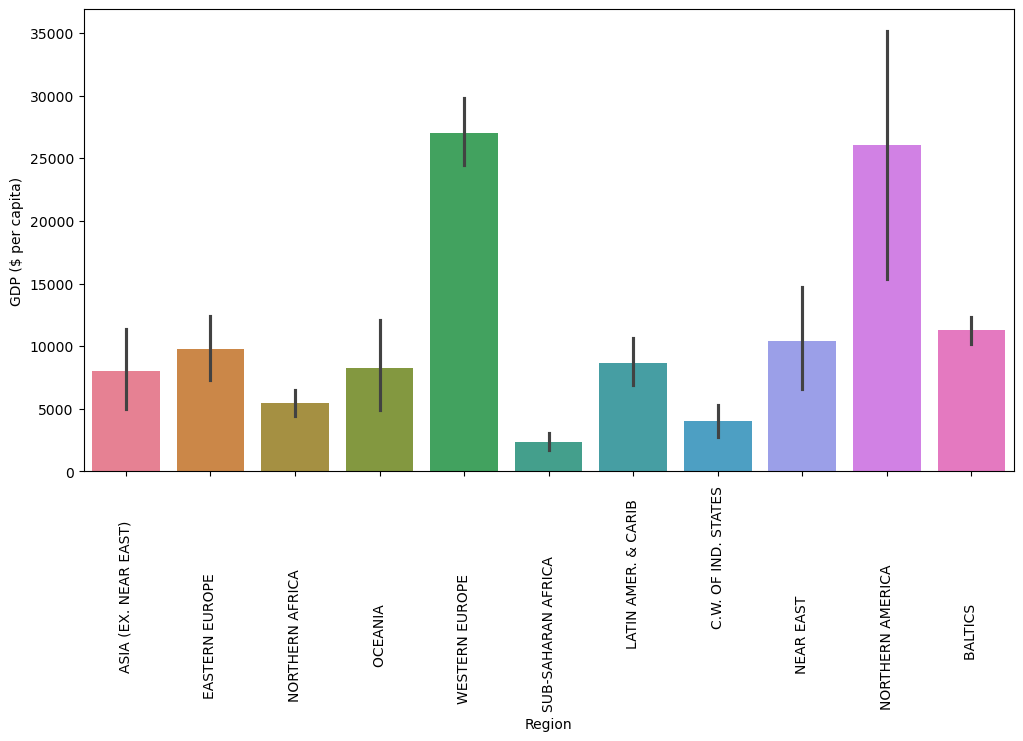

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'GDP ($ per capita)', x = 'Region', data=df, hue = 'Region')
plt.xticks(rotation=90);

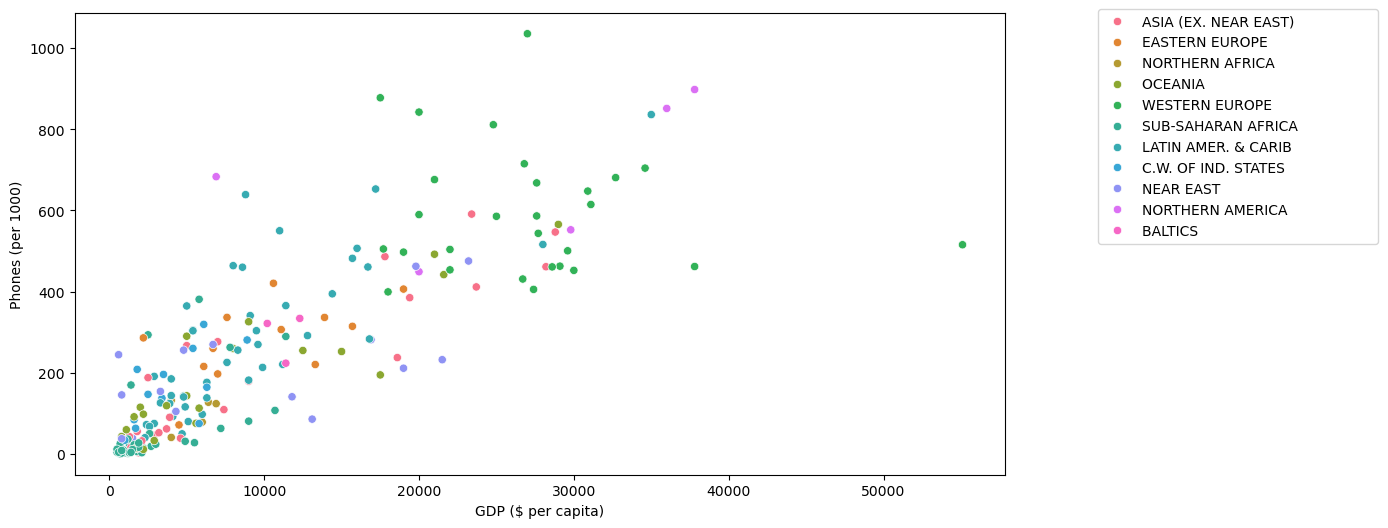

In [114]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, hue='Region', x = 'GDP ($ per capita)', y = 'Phones (per 1000)');
plt.legend(loc = (1.1, 0.5))

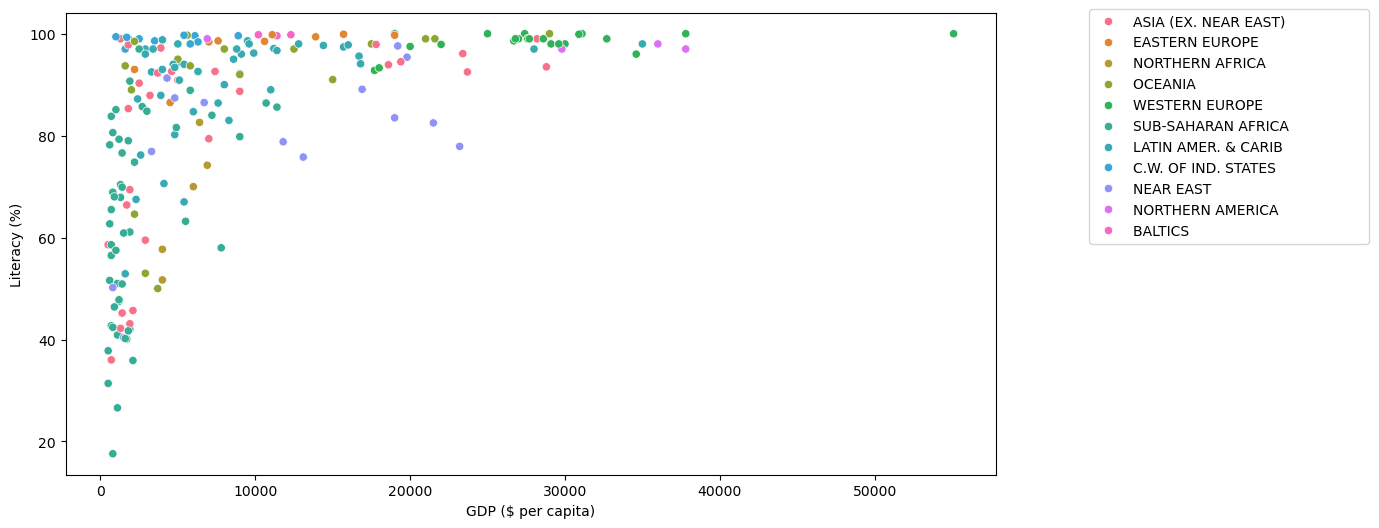

In [115]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, hue='Region', x = 'GDP ($ per capita)', y = 'Literacy (%)');
plt.legend(loc = (1.1, 0.5))

<Axes: >

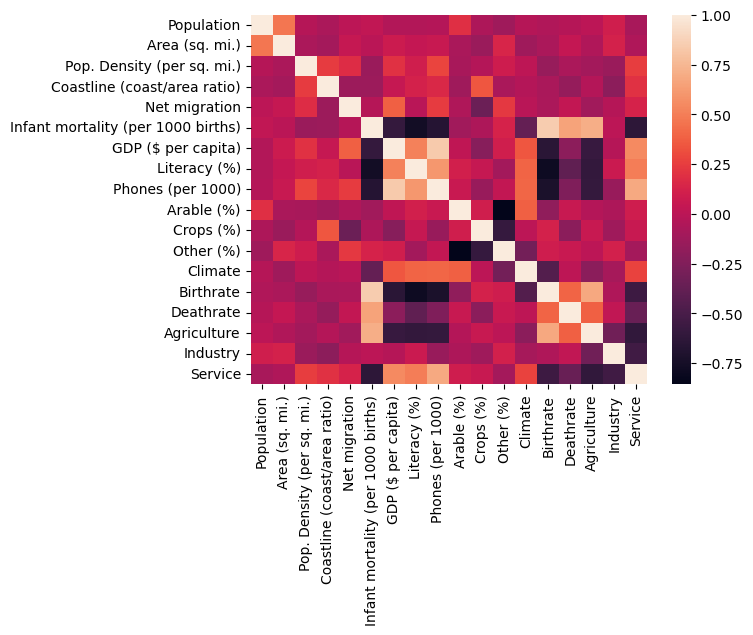

In [116]:
sns.heatmap(df.corr(numeric_only=True))

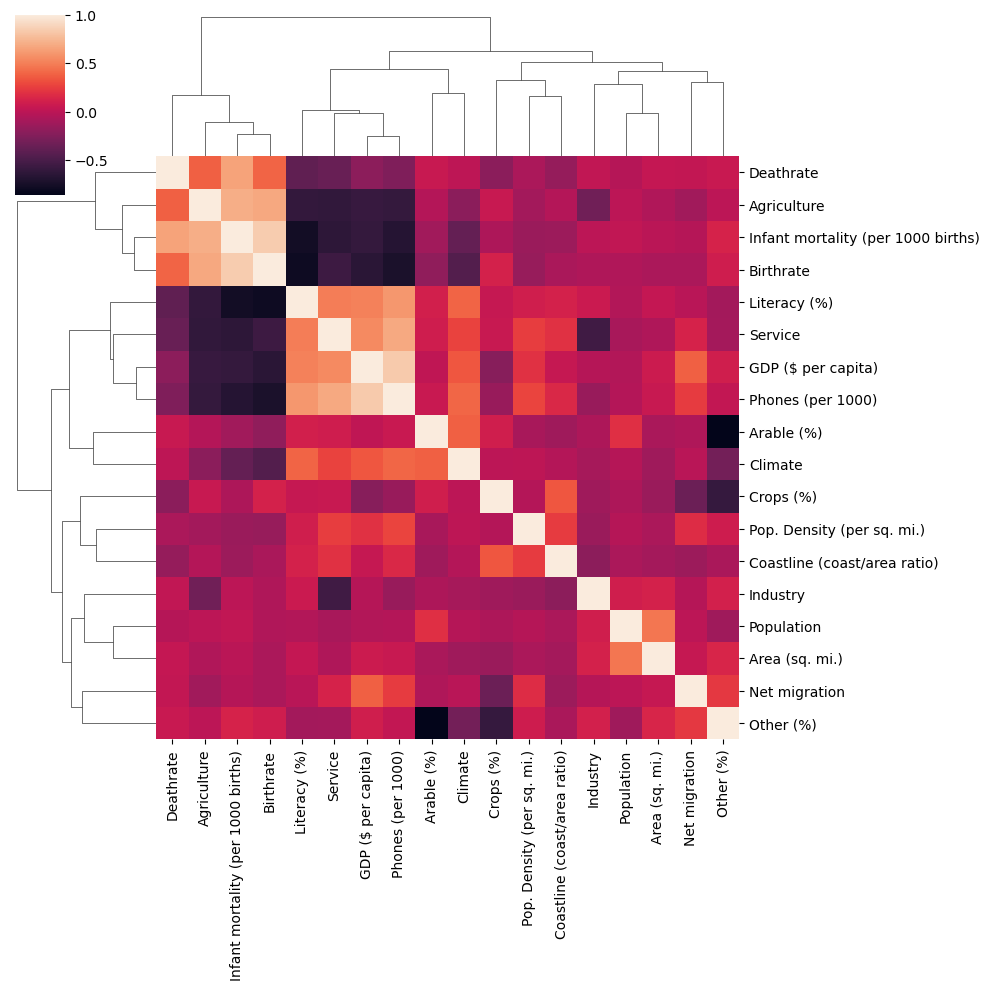

In [117]:
sns.clustermap(df.corr(numeric_only=True))

In [118]:
#подготовка данных
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [119]:
df = pd.read_csv('../DATA/CIA_Country_Facts.csv')
keys = df[df['Agriculture'].isnull()]['Country'].keys()

In [120]:
for n in keys:
    df.iloc[n] = df.iloc[n].fillna(0)
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [121]:
df[df['Climate'].isnull()]['Country'].values

array(['Angola', 'Canada', 'Croatia', 'Faroe Islands', 'Italy', 'Lebanon',
       'Libya', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco',
       'Morocco', 'Nepal', 'Russia', 'Serbia', 'Slovenia', 'Tanzania'],
      dtype=object)

In [122]:
keys_climate = df[df['Climate'].isnull()]['Country'].keys()
df[df['Climate'].isnull()]['Country'].keys()[0]

5

In [123]:
df['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [124]:
df[df['Climate'].isnull()]['Country'].values

array(['Angola', 'Canada', 'Croatia', 'Faroe Islands', 'Italy', 'Lebanon',
       'Libya', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco',
       'Morocco', 'Nepal', 'Russia', 'Serbia', 'Slovenia', 'Tanzania'],
      dtype=object)

In [125]:
df[df['Climate'].isnull()]['Country'].values

array(['Angola', 'Canada', 'Croatia', 'Faroe Islands', 'Italy', 'Lebanon',
       'Libya', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco',
       'Morocco', 'Nepal', 'Russia', 'Serbia', 'Slovenia', 'Tanzania'],
      dtype=object)

In [126]:
#df[df['Climate'].isnull()]['Country'].keys()[0]
row_index1 = df[df['Climate'].isnull()]['Country'].keys()[0]
#df1.loc[row_index1,'Climate']

In [127]:
#df1 = pd.read_csv('../DATA/CIA_Country_Facts.csv')
df = pd.read_csv('../DATA/CIA_Country_Facts.csv')
keys = df[df['Agriculture'].isnull()]['Country'].keys()

for n in keys:
    df.iloc[n] = df.iloc[n].fillna(0)
df.isna().sum()



Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [128]:
df.loc[5,'Climate']

nan

In [140]:
for n in range(0, len(df[df['Climate'].isnull()]['Country'].values)):
    country = df[df['Climate'].isnull()]['Country'].values[n]
    region = df[df['Country'] == country]['Region'].values[0]
    
    mean = df[df['Region'] == region]['Climate'].mean()
    row_index = df[df['Climate'].isnull()]['Country'].keys()[n]
    #col_index = 14
    df.loc[row_index,'Climate'] = round(mean,2)
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [148]:
for n in range(0, len(df[df['Literacy (%)'].isnull()]['Country'].values)):
    country = df[df['Literacy (%)'].isnull()]['Country'].values[n]
    region = df[df['Country'] == country]['Region'].values[0]
    
    mean = df[df['Region'] == region]['Climate'].mean()
    row_index = df[df['Literacy (%)'].isnull()]['Country'].keys()[n]
    #col_index = 14
    df.loc[row_index,'Literacy (%)'] = round(mean,2)
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [150]:
df = df.dropna()
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             221 non-null    object 
 1   Region                              221 non-null    object 
 2   Population                          221 non-null    int64  
 3   Area (sq. mi.)                      221 non-null    int64  
 4   Pop. Density (per sq. mi.)          221 non-null    float64
 5   Coastline (coast/area ratio)        221 non-null    float64
 6   Net migration                       221 non-null    float64
 7   Infant mortality (per 1000 births)  221 non-null    float64
 8   GDP ($ per capita)                  221 non-null    float64
 9   Literacy (%)                        221 non-null    float64
 10  Phones (per 1000)                   221 non-null    float64
 11  Arable (%)                          221 non-null  

In [154]:
#Модель
X = df.drop('Country', axis=1)

In [156]:
X = pd.get_dummies(df.drop('Country', axis=1), dtype=int)

In [158]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [160]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [164]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

In [166]:
from sklearn.cluster import KMeans

In [168]:
ssd = []

for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

D:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

Text(0, 0.5, ' Sum of Squared Distances')

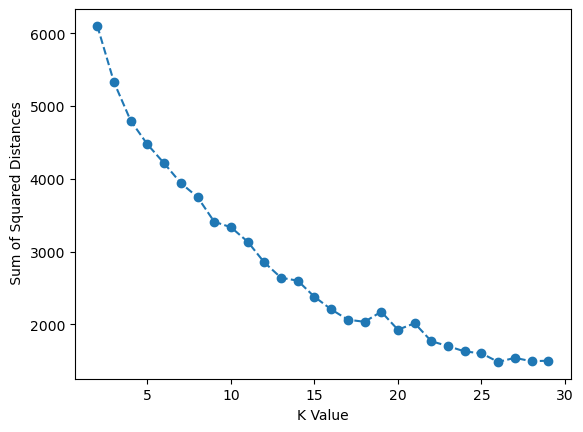

In [170]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [172]:
pd.Series(ssd).diff()

0            NaN
1    -774.403066
2    -528.609488
3    -324.115581
4    -259.637988
5    -272.041734
6    -192.154456
7    -338.592874
8     -76.178252
9    -197.163188
10   -286.115670
11   -209.878136
12    -40.669927
13   -221.019769
14   -172.502468
15   -142.200608
16    -29.197196
17    138.311146
18   -247.051179
19     88.997304
20   -246.565070
21    -67.848352
22    -73.249373
23    -25.096445
24   -118.504170
25     55.900715
26    -46.848235
27      8.135668
dtype: float64

<Axes: >

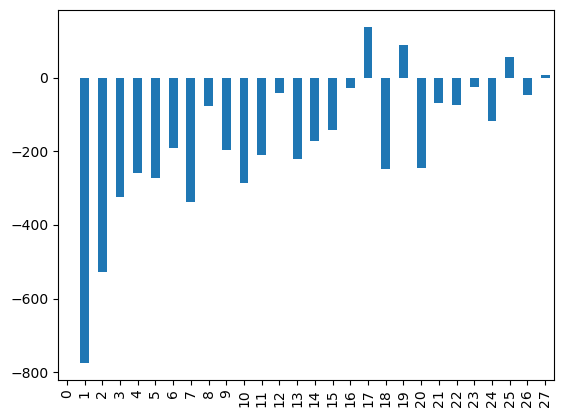

In [174]:
pd.Series(ssd).diff().plot(kind='bar')

In [176]:
model = KMeans(n_clusters=6)
model.fit(scaled_X)

D:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [178]:
model.labels_

array([1, 3, 3, 0, 2, 1, 3, 3, 3, 5, 3, 2, 2, 5, 3, 4, 3, 3, 5, 2, 3, 1,
       2, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 0, 2,
       2, 3, 0, 1, 1, 4, 5, 2, 1, 2, 2, 3, 3, 3, 0, 3, 1, 1, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 4, 2, 2, 4, 2, 3, 2, 2, 4, 5, 1, 0, 3, 3, 4, 5, 1,
       2, 4, 1, 1, 3, 2, 2, 2, 2, 3, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3, 1, 3,
       0, 5, 3, 3, 3, 1, 1, 0, 1, 2, 3, 0, 0, 3, 1, 1, 0, 2, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 3, 4, 3, 3, 5, 1, 3, 3, 3, 3, 3, 0, 2, 0, 4, 1,
       3, 1, 2, 3, 3, 0, 1, 1, 2, 3, 1, 3, 1, 2, 2, 4, 2, 5, 1, 3, 1, 0,
       3, 3, 4, 5, 3, 0, 1, 5, 4, 2, 2, 3, 5, 0, 3, 3, 3, 0, 4, 3, 4, 1,
       1])

In [180]:
X['K=6'] = model.labels_

In [182]:
X.corr()['K=6'].sort_values()

Region_OCEANIA                               -0.536299
Region_SUB-SAHARAN AFRICA                    -0.472454
Birthrate                                    -0.364906
Deathrate                                    -0.337151
Infant mortality (per 1000 births)           -0.307547
Agriculture                                  -0.269754
Coastline (coast/area ratio)                 -0.224609
Crops (%)                                    -0.205132
Region_WESTERN EUROPE                        -0.080992
Net migration                                -0.041191
Region_BALTICS                               -0.026020
Other (%)                                    -0.007693
Pop. Density (per sq. mi.)                    0.000671
Region_NORTHERN AMERICA                       0.013606
GDP ($ per capita)                            0.039875
Climate                                       0.056031
Region_ASIA (EX. NEAR EAST)                   0.067764
Population                                    0.083468
Region_NOR